## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing_df = pd.read_csv('../data/train.csv')

housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Distribution of sale price

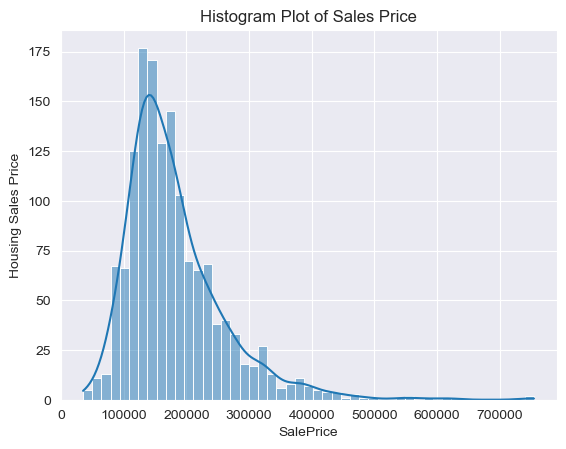

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [47]:
sale_price = housing_df['SalePrice']

sns.histplot(sale_price, kde=True)

plt.ylabel("Housing Sales Price")
plt.title("Histogram Plot of Sales Price")

plt.savefig('../results/part3/hist_sale_price.png', bbox_inches="tight")
plt.show()
sale_price.describe()

Scatter plot of gr living area and sale price

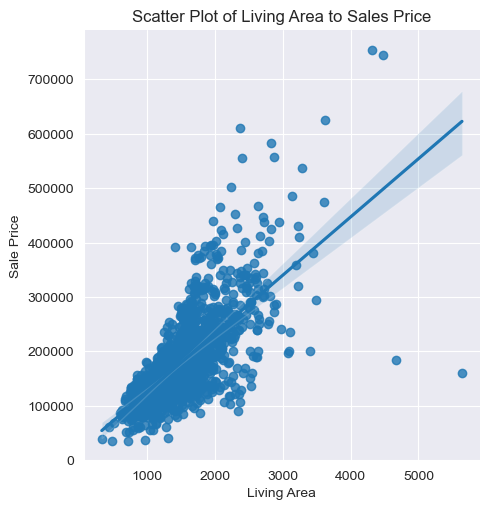

In [48]:
sns.lmplot(housing_df, x="GrLivArea", y="SalePrice")

plt.xlabel("Living Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Living Area to Sales Price")

plt.savefig('../results/part3/living_to_price.png', bbox_inches="tight")
plt.show()

Distribution of sale condition

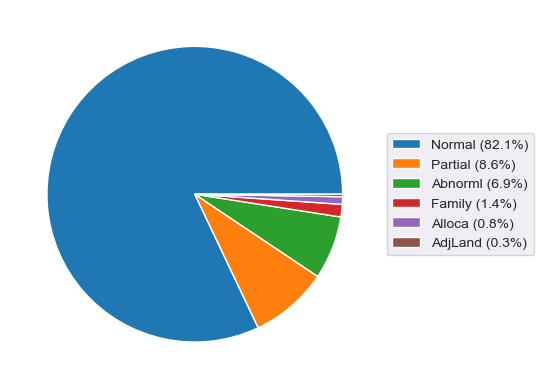

In [49]:
sale_cond_rel_freq = housing_df['SaleCondition'].value_counts(normalize=True) * 100

sale_cond_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in
                    zip(sale_cond_rel_freq.index.values, sale_cond_rel_freq)]

plt.pie(sale_cond_rel_freq, labels=None)
plt.legend(labels=sale_cond_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('../results/part3/pie_sale_condition.png', bbox_inches="tight")
plt.show()

Overall condition/quality of house to sale price (side-by-side box)

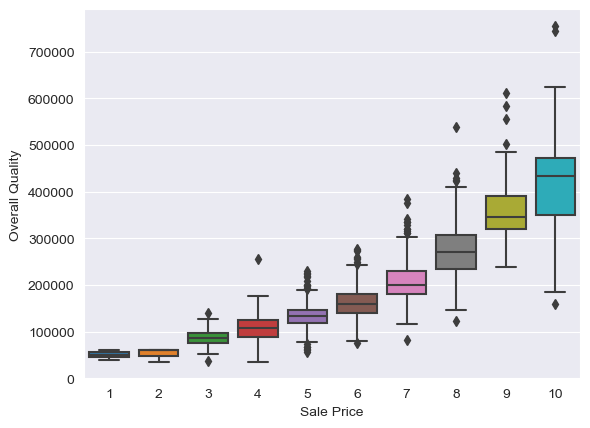

In [50]:
housing_box_plot = sns.boxplot(housing_df, x="OverallQual", y="SalePrice")
housing_box_plot.set(xlabel='Sale Price', ylabel='Overall Quality')

housing_box_plot_fig = housing_box_plot.get_figure()
housing_box_plot_fig.savefig('../results/part3/quality_to_price.png', bbox_inches="tight")

Fireplace quality effecting heating quality

In [51]:
fireplace_qu = housing_df['FireplaceQu']
heating_qu = housing_df['HeatingQC']

In [52]:
# Creating a frequency table for passenger class and their survival rate (Class as rows & Survived as columns)
style_type_freq_table = pd.crosstab(fireplace_qu, heating_qu)

style_type_freq_table

HeatingQC,Ex,Fa,Gd,TA
FireplaceQu,,,,
Ex,22,0,2,0
Fa,14,1,3,15
Gd,254,13,45,68
Po,4,1,5,10
TA,160,5,57,91


In [53]:
df_percentage = style_type_freq_table.div(style_type_freq_table.sum(axis=1), axis=0) * 100

df_percentage

HeatingQC,Ex,Fa,Gd,TA
FireplaceQu,,,,
Ex,91.666667,0.000000,8.333333,0.000000
Fa,42.424242,3.030303,9.090909,45.454545
Gd,66.842105,3.421053,11.842105,17.894737
Po,20.000000,5.000000,25.000000,50.000000
TA,51.118211,1.597444,18.210863,29.073482


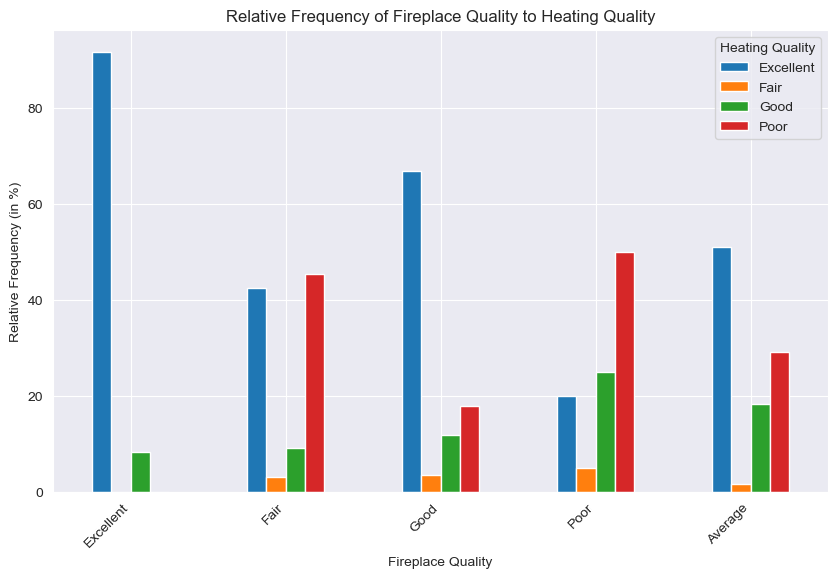

In [54]:
ax = df_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.xlabel('Fireplace Quality')
plt.ylabel('Relative Frequency (in %)')
plt.title('Relative Frequency of Fireplace Quality to Heating Quality')

plt.legend(title='Heating Quality')

# Set custom x-axis labels
new_labels = ['Excellent', 'Fair', 'Good', 'Poor', 'Average']
ax.set_xticks(range(len(new_labels)))
ax.set_xticklabels(new_labels, rotation=45, ha='right')

# Set custom legend labels
legend_labels = ['Excellent', 'Fair', 'Good', 'Poor', 'Average']
ax.legend(legend_labels, title='Heating Quality')

plt.savefig('../results/part3/fireplace_to_heating.png', bbox_inches="tight")
plt.show()

Github Link: https://github.com/RomanShrestha07/CPSC-Assignment-3